In [1]:
from __future__ import print_function
import torch
import torch.optim as optim
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import git
import sys

In [ ]:
# Clone the repository
git.Repo.clone_from("https://github.com/dusaurabh/Saurabh-ERA-V2-Master.git", "Saurabh-ERA-V2-Master")

In [ ]:
cd Saurabh-ERA-V2-Master

In [ ]:
!git pull origin main

In [ ]:
cd ..

In [2]:
# Get the full path to the repository directory
repo_path = os.path.abspath('Saurabh-ERA-V2-Master')

# Append the repository path
sys.path.append(repo_path)

# Check the contents of the directory
print(os.listdir(repo_path))

['.git', 'Assignment_10', 'Assignment_11', 'main.py', 'Miscellaneous', 'models', 'One_Cycle_Policy', 'README.md', 'utils.py', '__pycache__']


In [3]:
import models
from models.Assignment_11_models import ResNet18
from utils import train_test_data_loader, get_training_images, get_misclassified_images, grad_cam_func
from main import CIFAR10Dataset, train, test, train_func, test_func

PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
Failed to delete directory 'GRAD-CAM' after 3 attempts.
Error: Directory deletion failed. Cloning aborted.
Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader, test_loader = train_test_data_loader(train,test)
train_loader_copy, test_loader_copy = train_test_data_loader(train,test)

CUDA Available? True
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


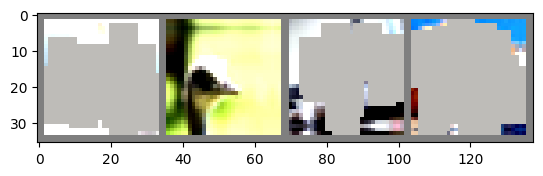

'ship  bird  cat   dog  '

In [5]:
get_training_images(train_loader)

In [6]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
model_copy =  ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [7]:
from torch.optim.lr_scheduler import OneCycleLR

LRMIN = 1.91E-01/100
LRMAX = 1.91E-01
print('LRMIN ',LRMIN)
print('LRMAX ',LRMAX)

LRMIN  0.00191
LRMAX  0.191


In [8]:
optimizer_copy = optim.SGD(model_copy.parameters(), lr=LRMIN)  # Set initial LR to 0.01
scheduler = OneCycleLR(optimizer_copy, max_lr=LRMAX, total_steps=21, epochs=4, steps_per_epoch=len(train_loader), pct_start=0.3, anneal_strategy='linear', div_factor=10.0, three_phase=False, final_div_factor=1e4, base_momentum=0.85, max_momentum=0.95)

EPOCHS = 21
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_func(model_copy, device, train_loader, optimizer_copy, epoch)
    test_func(model_copy, device, test_loader)
    scheduler.step()

EPOCH: 0


Loss=1.6724929809570312 Batch_id=97 Accuracy=31.01: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.46it/s]



Test set: Average loss: 1.5302, Accuracy: 4182/10000 (41.82%)

EPOCH: 1


Loss=1.5139623880386353 Batch_id=97 Accuracy=42.10: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 1.3888, Accuracy: 5066/10000 (50.66%)

EPOCH: 2


Loss=1.3559300899505615 Batch_id=97 Accuracy=48.54: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 1.5051, Accuracy: 5252/10000 (52.52%)

EPOCH: 3


Loss=1.4046357870101929 Batch_id=97 Accuracy=52.65: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 1.0516, Accuracy: 6449/10000 (64.49%)

EPOCH: 4


Loss=1.08453369140625 Batch_id=97 Accuracy=56.37: 100%|████████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 1.0844, Accuracy: 6414/10000 (64.14%)

EPOCH: 5


Loss=1.1427574157714844 Batch_id=97 Accuracy=59.01: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 0.7973, Accuracy: 7258/10000 (72.58%)

EPOCH: 6


Loss=1.0912506580352783 Batch_id=97 Accuracy=61.46: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.8193, Accuracy: 7086/10000 (70.86%)

EPOCH: 7


Loss=1.0758270025253296 Batch_id=97 Accuracy=63.77: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.6623, Accuracy: 7726/10000 (77.26%)

EPOCH: 8


Loss=0.9386530518531799 Batch_id=97 Accuracy=65.30: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.6296, Accuracy: 7794/10000 (77.94%)

EPOCH: 9


Loss=0.9520547986030579 Batch_id=97 Accuracy=66.55: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.47it/s]



Test set: Average loss: 0.6633, Accuracy: 7712/10000 (77.12%)

EPOCH: 10


Loss=0.8142176866531372 Batch_id=97 Accuracy=68.09: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 0.5322, Accuracy: 8201/10000 (82.01%)

EPOCH: 11


Loss=0.9359195232391357 Batch_id=97 Accuracy=68.99: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.5274, Accuracy: 8186/10000 (81.86%)

EPOCH: 12


Loss=0.9455351233482361 Batch_id=97 Accuracy=70.34: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.5267, Accuracy: 8233/10000 (82.33%)

EPOCH: 13


Loss=0.7639307975769043 Batch_id=97 Accuracy=71.04: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.5368, Accuracy: 8160/10000 (81.60%)

EPOCH: 14


Loss=0.7943253517150879 Batch_id=97 Accuracy=71.86: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.4801, Accuracy: 8336/10000 (83.36%)

EPOCH: 15


Loss=0.7461550831794739 Batch_id=97 Accuracy=72.64: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.4454, Accuracy: 8495/10000 (84.95%)

EPOCH: 16


Loss=0.7194964289665222 Batch_id=97 Accuracy=73.89: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.4419, Accuracy: 8511/10000 (85.11%)

EPOCH: 17


Loss=0.7973402142524719 Batch_id=97 Accuracy=74.20: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.4103, Accuracy: 8577/10000 (85.77%)

EPOCH: 18


Loss=0.7236141562461853 Batch_id=97 Accuracy=75.52: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 0.4250, Accuracy: 8578/10000 (85.78%)

EPOCH: 19


Loss=0.6308162212371826 Batch_id=97 Accuracy=76.64: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.3446, Accuracy: 8863/10000 (88.63%)

EPOCH: 20


Loss=0.6719210743904114 Batch_id=97 Accuracy=77.18: 100%|██████████████████████████████| 98/98 [00:39<00:00,  2.48it/s]



Test set: Average loss: 0.3361, Accuracy: 8918/10000 (89.18%)



# As you can see that we got 89.18% highest test accuracy at 20th epoch

# Misclassification Code

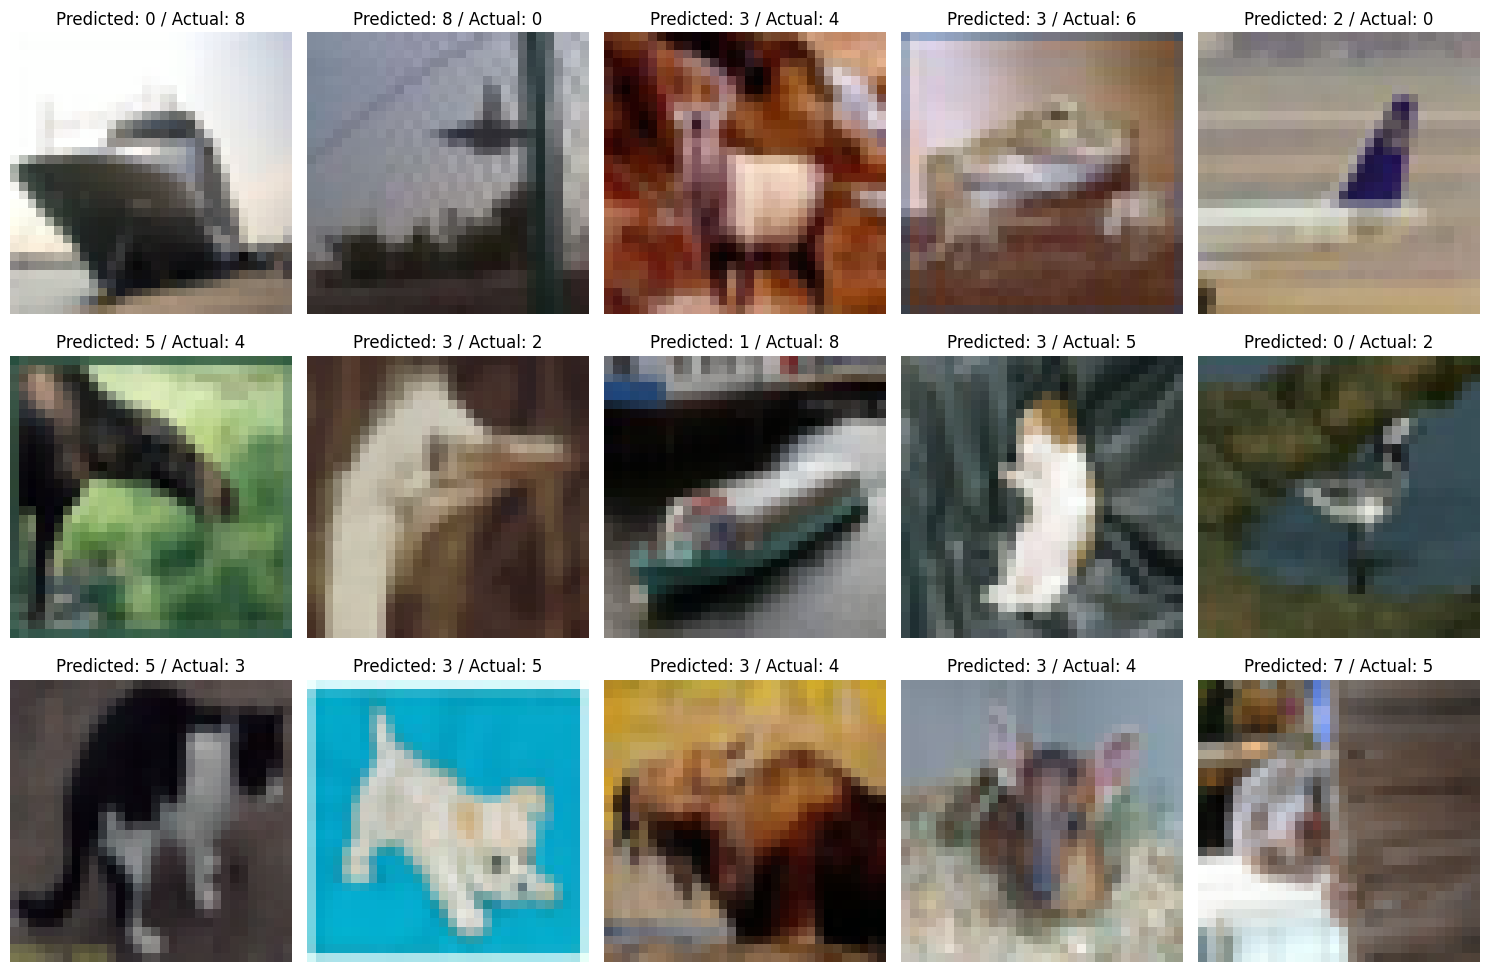

In [9]:
# Get misclassified images
misclassified_images = get_misclassified_images(model_copy, test_loader, device)


def show_misclassified_images():
    # Display misclassified images
    fig, axs = plt.subplots(3, 5, figsize=(15, 10))
    for i, (img, pred, target) in enumerate(misclassified_images):
        if i < 15:  # Ensure we don't exceed the number of subplots
            row = i // 5
            col = i % 5
    
            img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to numpy and transpose dimensions
            mean = np.array([0.4914, 0.4822, 0.4465])
            std = np.array([0.2470, 0.2434, 0.2615])
            img = std * img + mean  # Unnormalize
            img = np.clip(img, 0, 1)  # Clip to [0, 1]
            axs[row, col].imshow(img)
            axs[row, col].set_title(f'Predicted: {pred.item()} / Actual: {target.item()}')
            axs[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

show_misclassified_images()

# Above is the 10 misclassified images

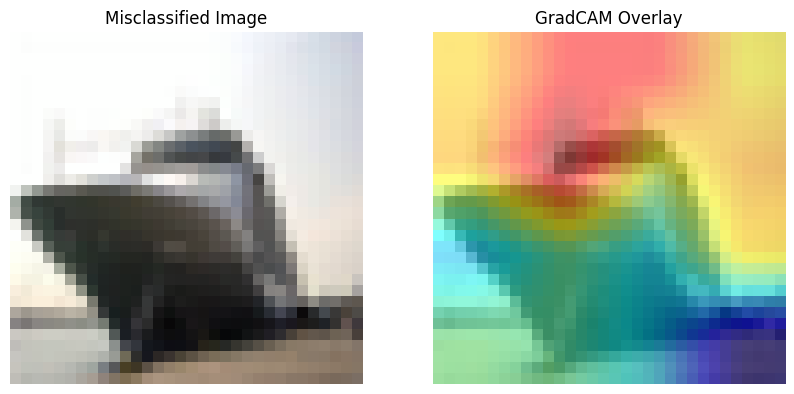

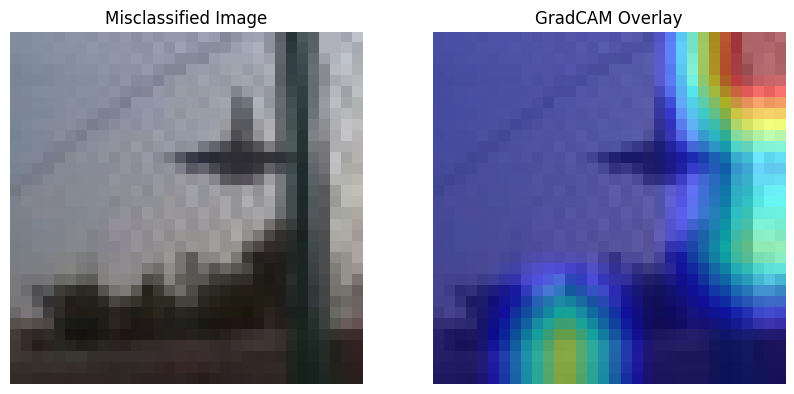

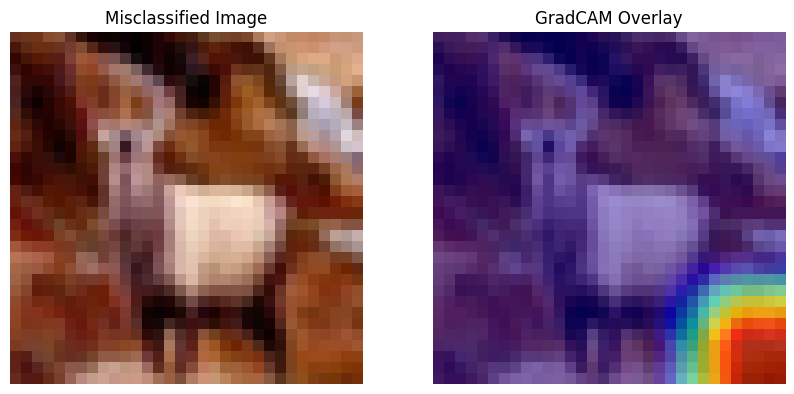

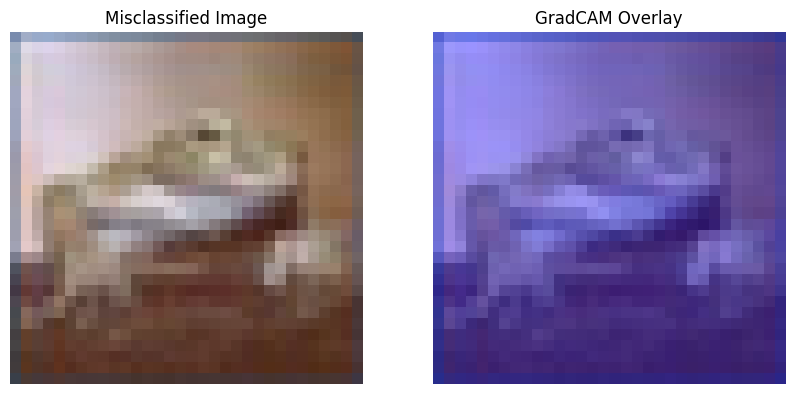

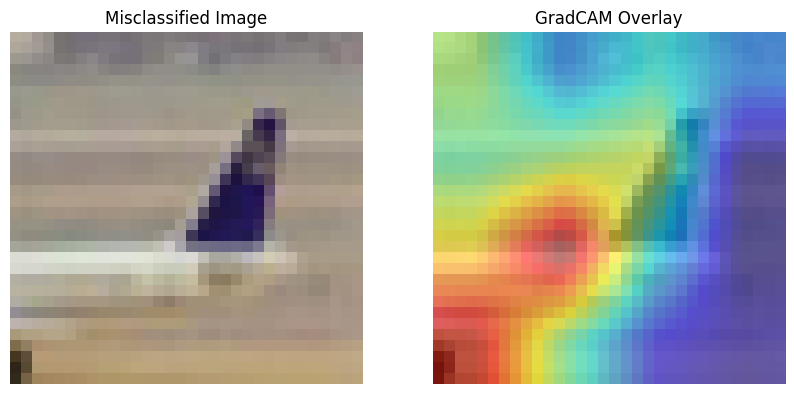

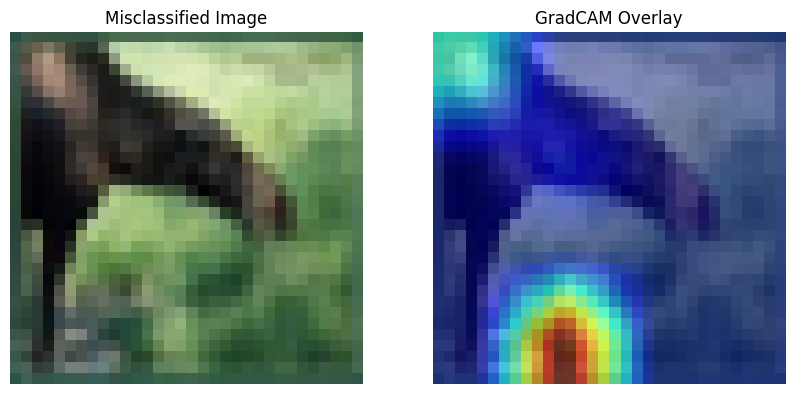

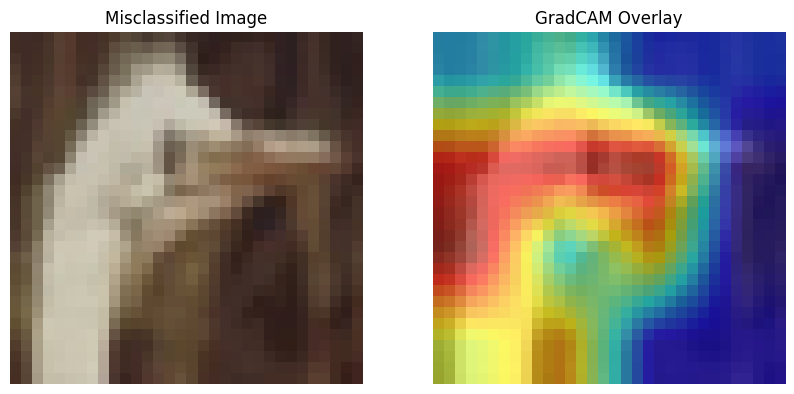

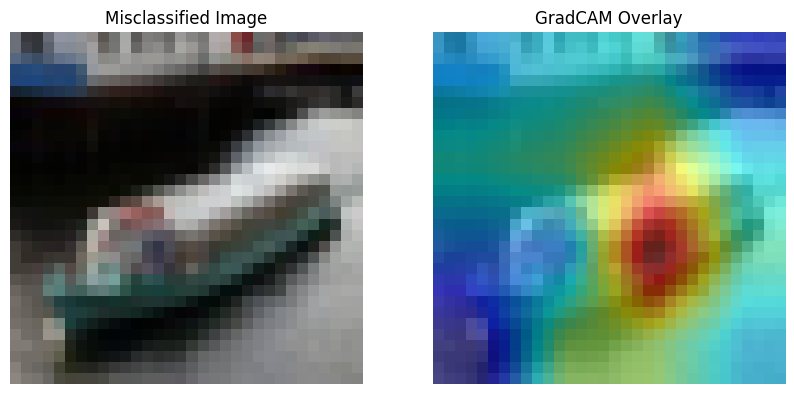

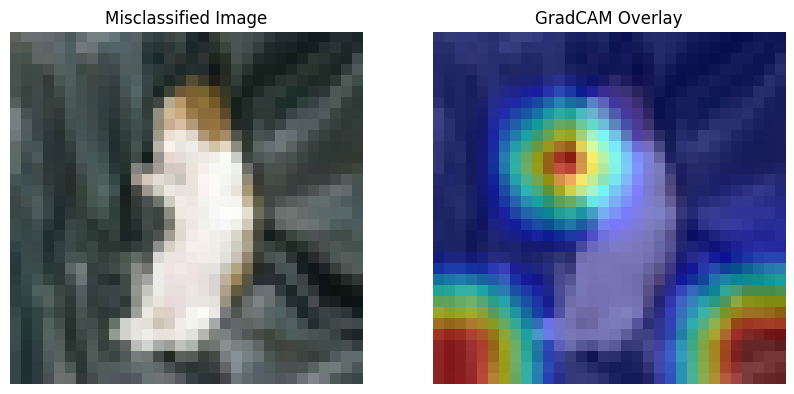

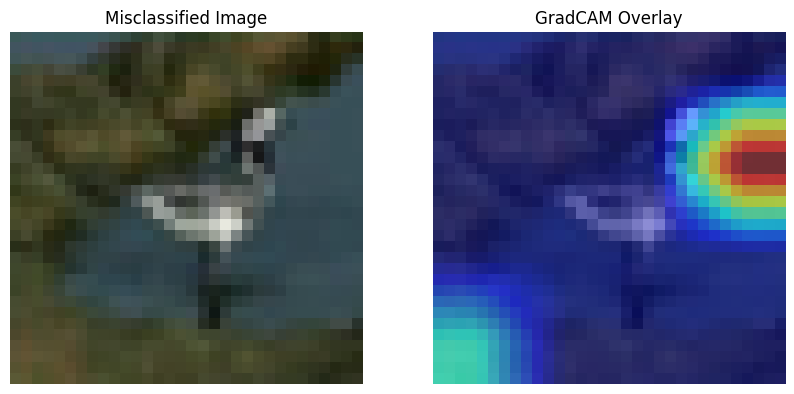

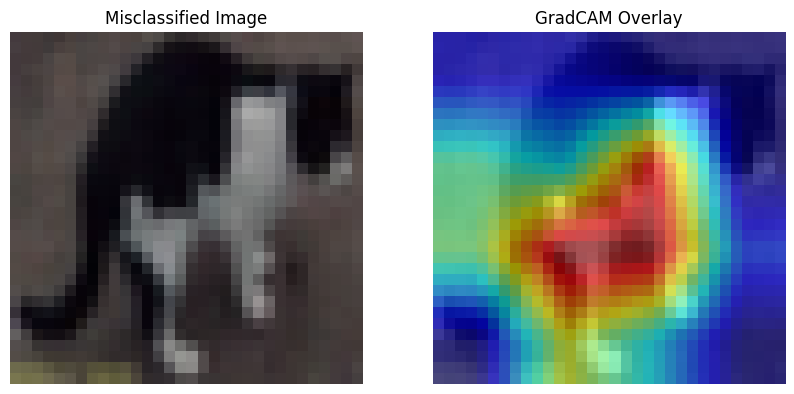

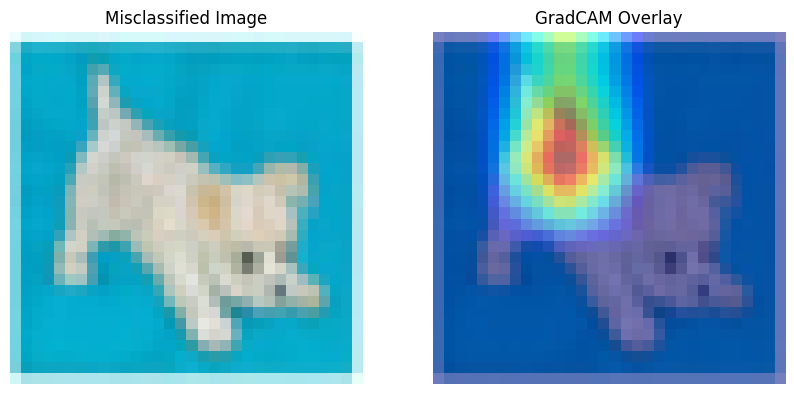

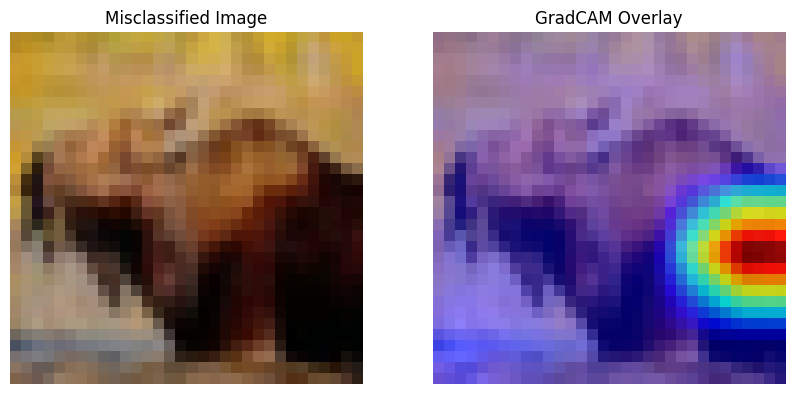

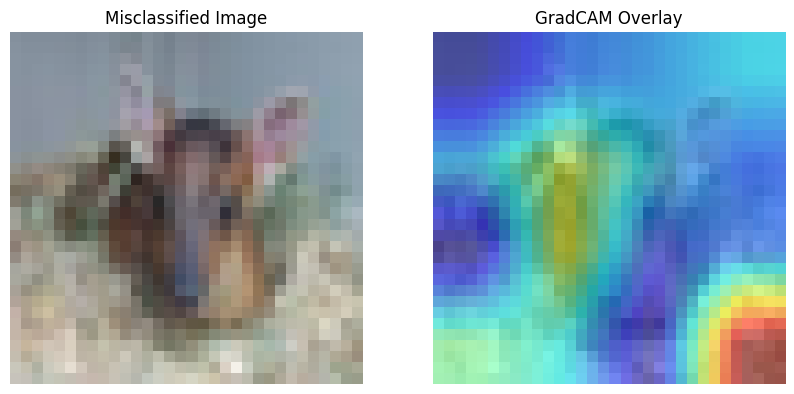

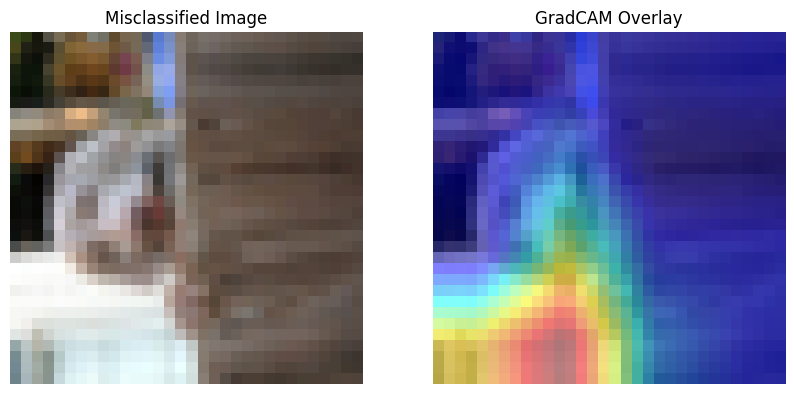

In [10]:
grad_cam_func(model_copy,misclassified_images)

# Above is the 10 Grad Cam on misclassified images